# The Battle of Neighborhood: Japan Hostels

### Table of Content:  
1. [Introduction/Business Understanding](#1.-Introduction/Business-Understanding)
2. [Analytic Approach](#2.-Analytic-Approach)
3. [Data Requirements](#3.-Data-Requirements)
4. [Data Preparation/Pre-processing](#4.-Data-Preparation/Pre-processing)
5. [Analysis](#5.-Analysis)
6. [Conclusion](#6.-Conclusion)

<img src="images/tokyo.jpg" width="65%"/>

## 1. Introduction/Business Understanding

#### 1.1 Background

Working as a Lead Engineer is quite tiring especially before releases and higher management meetings. Thankfully, I've developed a hobby which let's me unwind and at the same time helps me build a global perspective. As someone who loves travelling, finding ways to save money and travel low-cost is essential. There's little to save while booking flights and I'd rather pay more to traveling comfortably on a 16Hr flight than try to save and wear myself down even before the trip begins! But we can always save a few bucks on accomodation.

A hostel is a low-budget accommodation shared among travelers. Staying at hostels is an extremely affordable option for travelers. Not only that, It also gives you a chance to expereince which you would never at a hotel. I've found that experiencing hostel life one of the best ways to travel the world on a budget and here’s why:
1. You'll save a lot of money trust me.
2. Meet other like-minded travellers and make new friends around the world!
3. Most hostels organize lot of social activites

#### 1.2 Problem Description:

Hostel accomodation is a booming industry with the latest rise in tourism worldwide, especially in Asia. Over 20% of the total tourists worldwide are aged between 19-25. And around 80% of them prefer to spend less on accomodation by opting for hostels. This means the demand for hostels is only going to grow further and more people would want to get their legs in the game. 
- How should a new business person decide where to build for a hostel?
- What factors should he look at before investing?
- Which neighborhood venues affect a user's rating for *location* of hostel?

At the same time, it is difficult for a travellers, especially first-timers, to select a hostel from among many options. Hostel reviews are subjective and differ from person-to-person and one cannot solely depend on them to make a decision. It is especially important to consider other aspects like price and neighborhood, which can greatly influence one's experience of the city/country.
I will try to answer the following questions 
- How does price vary with location?
- Where are the <i>'value of money'</i> hostels located?
- How does proximity to transportation affect hostel rating?
- Which hostels are most secure and where are they located?
- Suggest similar hostel but which cheaper price

For this project, we will be looking at hostels in Japan

#### 1.3 Target Audience

<<*Change this section if models change*>>

This project will serve two groups of audience:
1. **Travellers:** Help them make an informed decision while choosing a hostel by providing an in-depth analysis of hostels and their neighborhood.
2. **Business Person:** Provide useful information and models which can help them where to open their first/next hostel and how much should they charge.

## 2. Analytic Approach
I will be taking two approaches in the project.

Firstly, I will use *exploratory data analysis(EDA)* to uncover hidden properties of data and provide useful insights to the reader, both future traveller and investor.

Secondly, I will use *prescriptive analytics* to help a business person decide a location for new hostel and predict how much should be starting price at the hostel. I will use *clustering* (KMeans) and *regression (Decision Tree Regression)*

<<*Change this section if models change*>>

## 3. Data Requirements

> Change if data sources change

One city will be analysed in this project : **Tokyo**.

Following are the datasets used in the project along with the reasons for choosing them:

**1. [Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset)**: This dataset was web scraped from Hostelworld by Koki Ando and is available on Kaggle. This is the core dataset with which I'll work.

**2. [Foursquare API](https://developer.foursquare.com/docs/api)**: This API will help me get the venues around the hostel which I will use for EDA and clustering.

**3. [Tokyo Land Price](https://utinokati.com/en/details/land-market-value/area/Tokyo/)**: I will scrape this website to get land prices of various neighborhoods in Tokyo.

*__Note:__ Since there is a quota limit on Foursquare, I'll be downloading the data and storing it locally as csv for future use. So we do not have to pull same data again when we restart the data.*

Firstly, I will use the list of hostels from *Hostel dataset* and use *Foursquare API* to get venues around the Hostel. I will then use EDA to explore the neighborhood and how it affects the price of the hostel. I will also use the combined dataset to cluster similar hostels as per pricing and neighborhood. 

Second, I will combine the above data with the land price for the area in which the Hostel is situated and them develop clustering and regression models to predict where a new hostel should be opened and how much should it be priced at.

 ## 4. Data Preparation/Pre-processing

Let's import all the dependencies before we begin. If we need more, we will add them at a later point. I'll first add whatever I can think of.

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy import OpenCage
from sklearn.cluster import KMeans

%matplotlib inline

#### 4.1. Hostel Dataset:

Let's first deal with hostels datsaet. I will read the first dataset into a dataframe. For ease of access, I've already downloaded the dataset as csv from Kaggle. You can access the same [here](https://www.kaggle.com/koki25ando/hostel-world-dataset).

In [7]:
hostel_df = pd.read_csv('data/Hostel.csv')
hostel_df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


We will drop the 1st column and rename other columns to make them more readable.

In [8]:
columns = ['Name', 'City', 'StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
           'RatingCategory', 'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
           'Security', 'Staff', 'ValueForMoney', 'Longitude', 'Latitude']

In [9]:
hostel_df.drop(['Unnamed: 0'], axis=1, inplace=True)
hostel_df.columns = columns
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [10]:
print("Number of Hostels: ", hostel_df.shape[0])

Number of Hostels:  342


Let's check if any hostels are missing location data since that is essential for our analysis.

In [18]:
print("Num of hostels with missing Longitude: ", hostel_df.Longitude.isna().sum())

Num of hostels with missing Longitude:  44


In [19]:
print("Num of hostels with missing Latitude: ", hostel_df.Latitude.isna().sum())

Num of hostels with missing Latitude:  44


In [21]:
# Remove hostels with missing latitude and longitude 
hostel_df = hostel_df[hostel_df.Longitude.isna() == False]
hostel_df = hostel_df[hostel_df.Latitude.isna() == False]
hostel_df.shape

(298, 15)

If we see the DistanceFromCityCentre column, we see that it has distance as well as text, let's remove the unwanted text.

In [30]:
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.replace(r'[^\d\.]+', '', regex=True)
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


Let's do a final check if any more values are missing and what we want to do about them

In [31]:
hostel_df.count()

Name                      298
City                      298
StartPrice                298
DistanceFromCityCentre    298
OverallScore              298
RatingCategory            298
Atmosphere                298
Cleanliness               298
Facilities                298
Location                  298
Security                  298
Staff                     298
ValueForMoney             298
Longitude                 298
Latitude                  298
dtype: int64

<br>Noice! No more missing values.  
Let's check the if the datatype of each column in proper

In [32]:
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre     object
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [33]:
# Convert DistanceFromCityCentre to float64
hostel_df.DistanceFromCityCentre = hostel_df.DistanceFromCityCentre.astype('float')
hostel_df.dtypes

Name                       object
City                       object
StartPrice                  int64
DistanceFromCityCentre    float64
OverallScore              float64
RatingCategory             object
Atmosphere                float64
Cleanliness               float64
Facilities                float64
Location                  float64
Security                  float64
Staff                     float64
ValueForMoney             float64
Longitude                 float64
Latitude                  float64
dtype: object

In [35]:
hostel_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
0,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


<br>Everything looks good here. Let's move on to fetch neighborhood data using Foursquare API.

#### 4.2 Neighborhood Data(Foursquare):

In [98]:
search_url = 'https://api.foursquare.com/v2/venues/search'
explore_url = 'https://api.foursquare.com/v2/venues/explore'

I've stored my foursqaure credentials in a file which I am reading below

In [99]:
with open("data/creds.json", 'r') as f:
    creds = json.load(f)
CLIENT_ID = creds['id'] # your Foursquare ID
CLIENT_SECRET = creds['secret'] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [100]:
sample_hotel = hostel_df.loc[0]
sample_hotel.Name

'"Bike & Bed" CharinCo Hostel'

In [66]:
params = dict(
  client_id=CLIENT_ID,
  client_secret=CLIENT_SECRET,
  v=VERSION,
  ll=f"{sample_hotel.Latitude}, {sample_hotel.Longitude}",
  radius=500,
  limit=100,
  sortByPopularity=1
)

In [108]:
def get_recommended_venues(name, lattitude, longitude, limit=100, radius=500):
    venues = []
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=f"{lattitude}, {longitude}",
        radius=radius,
        limit=limit,
        sortByPopularity=1
    )
    data = requests.get(explore_url, params=params).json()['response']['groups'][0]['items']
    for v in data:
        v = v['venue']
        primary_cat = ""
        for c in v['categories']:
            if(c['primary']):
                primary_cat=c['name']
        venues.append({
            'HostelName':name, 
            'VenueName': v['name'], 
            'Category': primary_cat, 
            'VenueLatitue': v['location']['lat'], 
            'VenueLongtitude': v['location']['lng']
        })
    return venues

In [114]:
venue_list = []

In [115]:
for name, lat, long in zip(hostel_df.Name, hostel_df.Latitude, hostel_df.Longitude):
    venue_list.extend(get_recommended_venues(name, lat, long))
    i = len(venue_list)
    print(i)

70
170
252
288
319
382
456
488
528
628
701
758
844
868
902
962
1062
1162
1262
1358
1458
1531
1584
1664
1761
1795
1843
1912
1926
1978
2000
2100
2200
2300
2400
2500
2600
2700
2743
2843
2943
3043
3143
3167
3267
3367
3467
3521
3566
3666
3733
3816
3860
3904
4004
4034
4066
4166
4190
4290
4364
4442
4507
4551
4623
4654
4754
4830
4906
5006
5032
5056
5156
5207
5254
5301
5381
5439
5539
5573
5589
5614
5638
5672
5727
5764
5800
5900
5930
5939
5983
6083
6131
6158
6200
6221
6272
6318
6342
6442
6465
6499
6553
6653
6753
6819
6877
6923
6965
7037
7092
7125
7173
7212
7278
7378
7454
7554
7622
7722
7764
7809
7861
7861
7883
7926
7994
8017
8073
8103
8130
8183
8229
8329
8429
8491
8536
8557
8657
8725
8805
8905
8960
9058
9119
9215
9261
9361
9457
9518
9556
9611
9640
9740
9798
9898
9998
10089
10143
10183
10236
10323
10344
10351
10451
10534
10565
10665
10710
10762
10850
10950
11050
11150
11246
11346
11446
11546
11622
11693
11737
11824
11851
11903
11998
12047
12094
12103
12108
12185
12231
12331
12359
12394
12426
1243

KeyError: 'groups'

In [118]:
venues_df = pd.DataFrame(venue_list)
venues_df = venues_df.rename(columns={'VenueLatitue': 'VenueLatitude', 'VenueLongtitude': 'VenueLongitude'})
venues_df.head()

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
0,"""Bike & Bed"" CharinCo Hostel",Lawson (ローソン S OSL谷町四丁目駅北店),Convenience Store,34.683282,135.517281
1,"""Bike & Bed"" CharinCo Hostel",モナコ,Café,34.683210,135.517309
2,"""Bike & Bed"" CharinCo Hostel",7-Eleven (セブンイレブン 大阪谷町3丁目店),Convenience Store,34.683509,135.517793
3,"""Bike & Bed"" CharinCo Hostel",McDonald's (マクドナルド 地下鉄谷町四丁目店),Fast Food Restaurant,34.683109,135.517443
4,"""Bike & Bed"" CharinCo Hostel",City Plaza Osaka (シティプラザ大阪),Hotel,34.684020,135.510206


#### 4.3 Land Price Data(Foursquare):

I will scrape the following URL to get land prices in tokyo - https://utinokati.com/en/details/land-market-value/area/Tokyo/

In [146]:
land_price_url = 'https://utinokati.com/en/details/land-market-value/area/Tokyo/'

data = BeautifulSoup(requests.get(land_price_url).content)

In [163]:
price_df = pd.read_html(data.find('table', {'class':'table-condensed'}).prettify())[0]

In [164]:
price_df.drop(['#', 'Average Trading Price'], axis=1, inplace=True)
price_df.rename(columns={'Average Unit Price': 'PricePerSqMeter'}, inplace=True)
price_df.PricePerSqMeter = price_df.PricePerSqMeter.apply(lambda x: x.strip(' JPY/sq.m').replace(',', '')).astype(int)

In [165]:
price_df.head()

,Area,PricePerSqMeter
0,Chiyoda-Ku,1890610
1,Chuo-Ku,3178147
2,Minato-Ku,2339310
3,Shinjuku-Ku,930080
4,Bunkyo-Ku,966787


#### 4.4 Persist all datasets for later use

In [167]:
hostel_df.to_csv('data/hostels_cleaned.csv')
venues_df.to_csv('data/hostel_venues.csv')
price_df.to_csv('data/tokyo_land_prices.csv')

In [286]:
temp = hostel_df.iloc[0]
temp

Name                      "Bike & Bed" CharinCo Hostel
City                                             Osaka
StartPrice                                        3300
DistanceFromCityCentre                             2.9
OverallScore                                       9.2
RatingCategory                                  Superb
Atmosphere                                         8.9
Cleanliness                                        9.4
Facilities                                         9.3
Location                                           8.9
Security                                             9
Staff                                              9.4
ValueForMoney                                      9.4
Longitude                                      135.514
Latitude                                       34.6827
Name: 0, dtype: object

In [287]:
geo = OpenCage(api_key="28b371af498445e8842797870bb8dbbb")

In [288]:
cities = []
suburbs = []
for lat, long in zip(hostel_df.Latitude, hostel_df.Longitude):
    loc = geo.reverse(query=[lat, long], language='en')
    cities.append(loc[0].raw['components']['city'])
    suburbs.append(loc[0].raw['components']['suburb'])

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: OpenCage.reverse: default value for `exactly_one` argument will become True in geopy 2.0. Specify `exactly_one=False` as the argument explicitly to get rid of this warning.
  """Entry point for launching an IPython kernel.


In [289]:
loc[0].raw['components']

{'ISO_3166-1_alpha-2': 'JP',
 'ISO_3166-1_alpha-3': 'JPN',
 '_type': 'building',
 'building': '大阪内本町ビル',
 'city': 'Osaka',
 'continent': 'Asia',
 'country': 'Japan',
 'country_code': 'jp',
 'neighbourhood': '高津二丁目',
 'postcode': '540-0026',
 'road': '鎗屋町筋',
 'state': 'Osaka Prefecture',
 'suburb': 'Chuo'}

## 5. Analysis

### 5.1 Exploratory Data Analysis
Using EDA, we will try to answer the following questions:
- How does price vary with location?
- Which hostels are most secure and where are they located?
- Where are the <i>'value of money'</i> hostels located?
- How does proximity to transportation affect hostel rating?

Let's first start by analyzing which cities are covered in our dataset

In [315]:
hostel_df.City.value_counts()

Tokyo           116
Osaka            89
Kyoto            66
Fukuoka-City     14
Hiroshima        13
Name: City, dtype: int64

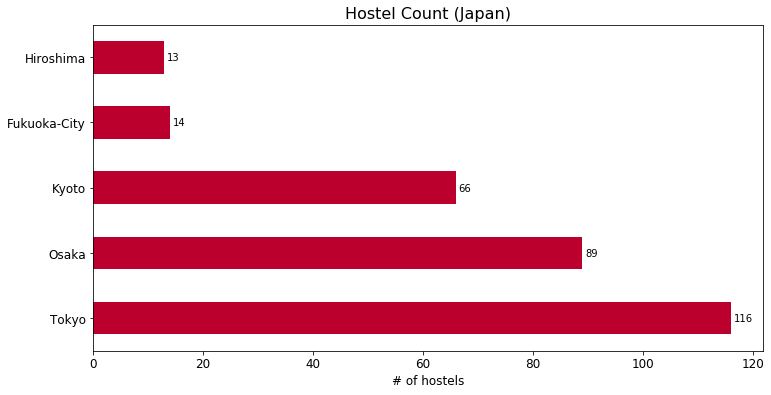

In [350]:
plt.figure(figsize=(12, 6))
ax = hostel_df.City.value_counts().plot(kind="barh", color="#BC002D", fontsize=12)
ax.set_title("Hostel Count (Japan)", fontsize=16)
ax.set_xlabel("# of hostels", fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() + 0.5, p.get_y() + 0.2))

<br>Tokyo has the most number of hostels which is understandable since it is once of the largest cities of the world and hence might attract a lot of visitors through its airport

<br>Going ahead, our focus will only be tokyo hostels

In [351]:
tokyo_hostels_df = hostel_df[hostel_df.City == "Tokyo"]
tokyo_hostels_df.head()

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044


In [352]:
tokyo_hostels_df.shape

(116, 15)

<br>Let's visualize all these hostels on the map

In [375]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

<br>

##### How does price vary with location?
As per me, the closer a hostel to the city center, the higher it's price. Let's see if we can prove that using data.

In [355]:
tokyo_hostels_df.StartPrice.value_counts()

2000       13
2500       12
2200       10
3000        8
3300        6
2400        6
1800        5
2600        5
2100        5
2300        4
1600        4
3600        4
2900        4
2700        3
3200        3
1500        3
1900        3
3800        2
4000        2
3700        2
4100        2
5400        1
3400        1
5500        1
7600        1
3500        1
6300        1
1003200     1
5200        1
1300        1
3900        1
Name: StartPrice, dtype: int64

We can see that one hostel has a very high starting price! Can a hostel charge 1003200 Yen? Doesn't seem likely. Hence, we will remove that row from the dataset.

In [356]:
tokyo_hostels_df = tokyo_hostels_df[tokyo_hostels_df.StartPrice < 1000000]

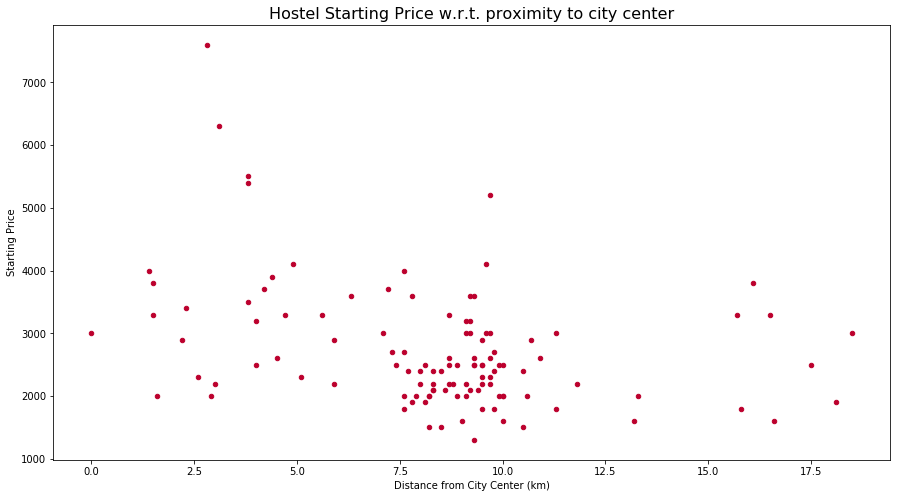

In [362]:
tokyo_hostels_df.plot(x='DistanceFromCityCentre', y='StartPrice', kind='scatter', figsize=(15, 8), color='#BC002D')
plt.xlabel("Distance from City Center (km)")
plt.ylabel("Starting Price")
plt.title("Hostel Starting Price w.r.t. proximity to city center", fontsize=16)
plt.show()

We cannot see any pattern which can help us verify our assumption. If our assumption was correct, we should be be seeing a curve which decreases as distance increases. However, there is on such curve visible.

Let's check the correlation score of StartPrice with DistanceFromCityCentre

In [369]:
tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre']].corr()

,StartPrice,DistanceFromCityCentre
StartPrice,1.000000,-0.346481
DistanceFromCityCentre,-0.346481,1.000000


The correlation coefficient is very less. Hence, we can say that the starting price of hostels does not vary according to its distance from the city center.

> **The starting price of hostels does not vary much depending on its distance from the city center.**

<br>

##### Which hostels are most secure and where are they located?
I have no idea as to where the most secure hostels are located. Let's find out!

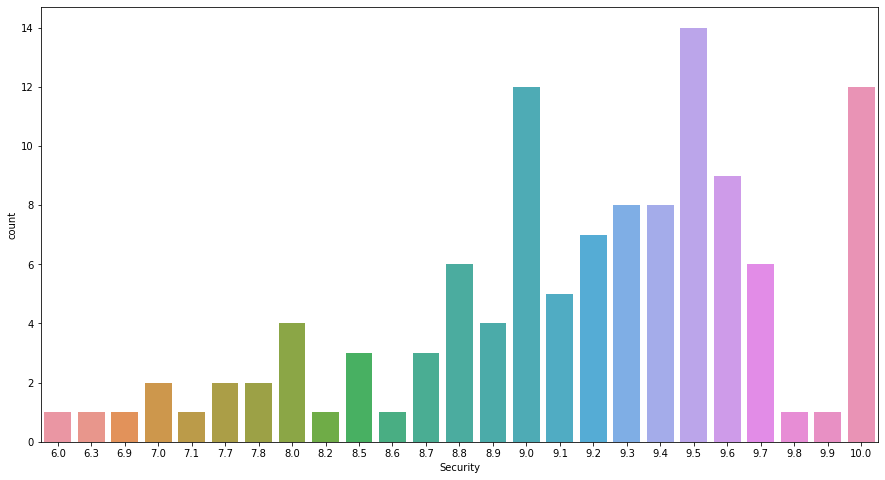

In [379]:
plt.figure(figsize=(15,8))
sns.countplot(x=tokyo_hostels_df.Security)

As we can see, most hostels are quite secure as rated by users, so that's some great news for travellers. Let's put hostels with security rating 9.5 and above on the map.

In [398]:
highsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security >= 9]
lowsec_hostels = tokyo_hostels_df[tokyo_hostels_df.Security < 9]


In [399]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# add markers to map
for lat, lng, label in zip(highsec_hostels.Latitude, highsec_hostels.Longitude, highsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
# add markers to map
for lat, lng, label in zip(lowsec_hostels.Latitude, lowsec_hostels.Longitude, lowsec_hostels.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#BC002D',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

FIND OUT THE AREA USING REVERSE GEOCODING. AND COMMENT WHICH AREA HAS MOST SECURE HOSTELS

<br>

##### Where are the 'value of money' hostels located?

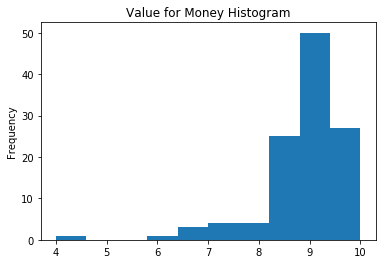

In [423]:
tokyo_hostels_df.ValueForMoney.plot(kind="hist")
plt.title("Value for Money Histogram")
plt.show()

Let's place hostels with highest 'value for money' rating

In [411]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)
high_vfm = tokyo_hostels_df[tokyo_hostels_df.ValueForMoney == 10]

# add markers to map
for lat, lng, label in zip(high_vfm.Latitude, high_vfm.Longitude, high_vfm.Name):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='#33cc33',
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

In [420]:
low_vfm.StartPrice.mean()

3390.909090909091

In [418]:
high_vfm.StartPrice.mean()

2781.818181818182

In [431]:
print("Distance from city center:")
print("Low Value for money: ", round(low_vfm.DistanceFromCityCentre.mean(), 2))
print("High Value for money: ", round(high_vfm.DistanceFromCityCentre.mean(), 2))

Distance from city center:
Low Value for money:  7.76
High Value for money:  9.9


> **High value for money hostels are comparatively cheaper and are located away from the city center** 

CHLOROPLETH HOSTELS AND AREA. SHOW AREA WITH MOST HOSTELS



##### Cheap hostels near metro stations?

We will remove rows with Empty VenueCategory

In [442]:
venues_df.Category.replace('', np.nan, inplace=True)
venues_df.dropna(inplace=True)
venues_df.shape

(15527, 5)

Let's check the frequency of each Venue Category

In [445]:
venues_df.Category.value_counts()

Convenience Store      1459
Ramen Restaurant        892
Japanese Restaurant     765
Café                    685
Hotel                   585
                       ... 
Bowling Alley             1
Garden Center             1
Laundromat                1
Temple                    1
Moving Target             1
Name: Category, Length: 323, dtype: int64

<br> Let's check the average number of venues per Hostel

In [450]:
venues_df.groupby('HostelName').count()

,VenueName,Category,VenueLatitude,VenueLongitude
HostelName,,,,
"""Bike & Bed"" CharinCo Hostel",70,70,70,70
&And Hostel Akihabara,100,100,100,100
&And Hostel Ueno,82,82,82,82
&And Hostel-Asakusa North-,36,36,36,36
1night1980hostel Tokyo,31,31,31,31
...,...,...,...,...
Sakura Hotel Nippori,53,53,53,53
Sakura La An,52,52,52,52
hostel DEN,76,76,76,76


Let's extract the hostels which are close to Metro Stations.

In [460]:
metro_hostels = venues_df[venues_df.Category.str.contains('Station')]
metro_hostels

,HostelName,VenueName,Category,VenueLatitude,VenueLongitude
70,&And Hostel Akihabara,Akihabara Station (秋葉原駅),Train Station,35.698357,139.773120
73,&And Hostel Akihabara,JR Sōbu Line Akihabara Station (JR 総武線 秋葉原駅),Train Station,35.698358,139.773288
74,&And Hostel Akihabara,Akihabara Electric Town Exit (秋葉原駅 電気街口),Train Station,35.698818,139.772570
170,&And Hostel Ueno,Iriya Entrance (JR上野駅 入谷口),Train Station,35.714337,139.778622
358,328 Hostel & Lounge,ホテル JAL CITY バス乗り場,Bus Station,35.551771,139.748390
...,...,...,...,...,...
14542,Piece Hostel Kyoto,九条駅 出入口2,Metro Station,34.979946,135.759636
14545,Piece Hostel Kyoto,九条河原町 バス停,Bus Station,34.979650,135.764092
14835,Qoo Ebisucho,Ebisucho Station (恵美須町駅),Metro Station,34.657006,135.505669
14863,Qoo Ebisucho,Hankai Tramway Ebisucho Station (阪堺電車 恵美須町駅),Tram Station,34.654218,135.505250


In [461]:
metro_hostels = tokyo_hostels_df[tokyo_hostels_df.Name.isin(metro_hostels.HostelName)]
metro_hostels.shape

(20, 15)

In [476]:
metro_hostels.RatingCategory.value_counts()

Fabulous     10
Superb        9
Very Good     1
Name: RatingCategory, dtype: int64

In [472]:
tokyo_hostels_df.RatingCategory.value_counts()

Superb       64
Fabulous     38
Very Good    11
Rating        1
Good          1
Name: RatingCategory, dtype: int64

In [482]:
print("Hostels located near a metro/train/bus station:")
print(f"{metro_hostels.RatingCategory.value_counts()['Fabulous']/metro_hostels.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a metro/train/bus station:
50.0% were rated Fabulous


In [483]:
print("In general:")
print(f"{tokyo_hostels_df.RatingCategory.value_counts()['Fabulous']/tokyo_hostels_df.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

In general:
33.04347826086956% were rated Fabulous


We can observe above that 50% of the hostels near metro/train/bus stations were rated Fabulous compared to only 33% in general.

This shows that there is some correlation between the proximity to mode of transportation and the overall rating of the hostel

> **The proportion of hostels rated fabulous is more near metro/bus/train stations than in general.**

In [486]:
store_hostels = tokyo_hostels_df[tokyo_hostels_df.Name.isin(venues_df[venues_df.Category.str.contains('Store')]['HostelName'].unique())]
store_hostels

,Name,City,StartPrice,DistanceFromCityCentre,OverallScore,RatingCategory,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude
2,&And Hostel Akihabara,Tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,Tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,Tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,1night1980hostel Tokyo,Tokyo,2100,9.4,7.0,Very Good,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
6,328 Hostel & Lounge,Tokyo,3300,16.5,9.3,Superb,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Retrometro Backpackers,Tokyo,3000,9.2,9.4,Superb,9.4,9.4,9.0,9.4,9.5,9.8,9.6,139.789362,35.713157
278,RYOKAN＆HOSTEL WASABI Nippori,Tokyo,2000,9.1,8.7,Fabulous,8.2,8.6,8.9,8.5,8.8,8.9,8.9,139.777723,35.732782
281,Sakura Hostel Asakusa,Tokyo,2400,9.8,8.6,Fabulous,7.7,8.6,8.4,8.9,9.0,9.0,8.7,139.794826,35.716022
282,Sakura Hotel Ikebukuro,Tokyo,2300,5.1,8.3,Fabulous,7.3,8.2,7.9,9.0,7.8,9.1,8.8,139.708803,35.733614


<br>


##### Which neighborhood venues affect a user's rating for location of hostel?
Let's do a similar analysis for a few categories and see how it affects the user rating. 

In [620]:
venues_df.Category.value_counts()[70:90]

Arts & Crafts Store       39
Platform                  39
Liquor Store              38
Sporting Goods Shop       38
Snack Place               37
Music Venue               34
Nightclub                 34
Dim Sum Restaurant        34
Shoe Store                33
Department Store          33
Furniture / Home Store    33
Inn                       31
Art Museum                31
History Museum            31
Museum                    30
Pastry Shop               30
Garden                    30
Multiplex                 30
Concert Hall              29
Art Gallery               29
Name: Category, dtype: int64

We'll do similar analysis for *Convenience Store*, *Restaurant*, *Bar*, *Shopping Mall* categories

In [585]:
hostels_near_store = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(venues_df.HostelName[venues_df.Category.str.contains('store', case=False)])]

In [586]:
hostels_near_store.RatingCategory.value_counts()

Superb       51
Fabulous     29
Very Good     9
Name: RatingCategory, dtype: int64

In [587]:
print("Hostels located near a convenience store:")
print(f"{hostels_near_store.RatingCategory.value_counts()['Fabulous']/hostels_near_store.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a convenience store:
32.58426966292135% were rated Fabulous


> **Travellers do not bother much about proximity to a convenience store doesn't since it doesn't seem to affect overall hostel rating.**

Next, we can carry the same analysis for restaurants

In [588]:
hostels_near_bar = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(venues_df.HostelName[venues_df.Category.str.contains('bar', case=False)])]

In [589]:
hostels_near_bar.RatingCategory.value_counts()

Superb       50
Fabulous     27
Very Good     8
Name: RatingCategory, dtype: int64

In [590]:
print("Hostels located near a Bar:")
print(f"{hostels_near_bar.RatingCategory.value_counts()['Fabulous']/hostels_near_bar.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a Bar:
31.76470588235294% were rated Fabulous


> **The proportion of hostels rated fabulous is less near a Bar than in general. Travellers seem to avoid hostels near bars**

Let's check for public parks

In [596]:
hostels_near_mall = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(venues_df.HostelName[venues_df.Category.str.contains('park', case=False)])]

In [597]:
hostels_near_mall.RatingCategory.value_counts()

Superb       35
Fabulous     14
Very Good     6
Name: RatingCategory, dtype: int64

In [598]:
print("Hostels located near a convenience store:")
print(f"{hostels_near_mall.RatingCategory.value_counts()['Fabulous']/hostels_near_mall.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a convenience store:
25.454545454545453% were rated Fabulous


> **Hostels with proximity to a park are quite lowly rated than others. Seems like travellers do not like public parks near hostels.**

In [626]:
hostels_near_site = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(venues_df.HostelName[venues_df.Category.str.contains('Historic Site', case=False)])]

In [627]:
hostels_near_site.RatingCategory.value_counts()

Fabulous     5
Superb       5
Very Good    2
Name: RatingCategory, dtype: int64

In [628]:
print("Hostels located near a historic site:")
print(f"{hostels_near_site.RatingCategory.value_counts()['Fabulous']/hostels_near_site.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
41.66666666666667% were rated Fabulous


> **The proportion of hostels rated fabulous is more near a historic site than in general.**

In [629]:
hostels_near_museum = tokyo_hostels_df[
    tokyo_hostels_df.Name.isin(venues_df.HostelName[venues_df.Category.str.contains('Museum', case=False)])]

In [630]:
hostels_near_museum.RatingCategory.value_counts()

Superb       12
Fabulous      6
Very Good     3
Name: RatingCategory, dtype: int64

In [631]:
print("Hostels located near a historic site:")
print(f"{hostels_near_museum.RatingCategory.value_counts()['Fabulous']/hostels_near_museum.RatingCategory.value_counts().sum()*100}% were rated Fabulous")

Hostels located near a historic site:
28.57142857142857% were rated Fabulous


> **Proportion of Hostels with proximity to a museum that are lowly rated is quite high than in general.**

<br>

### 5.2 Clustering

Now, we will cluster the hostels twice. Once depending on the different rating parameters and one based on their neighborhood.

Consider the following case, that a traveller has selected a hostel, but he finds that it is full! What options does he have? He/She can either go for a hostel which is similar in rating and price to the one he/she has selected. Or he/she can consider hostels which boast similar neighborhood to the selected one.

We will help traveller in both cases

#### 5.2.1 Clustering based on rating parameters

In [636]:
X = tokyo_hostels_df[['StartPrice', 'DistanceFromCityCentre', 'OverallScore', 
                      'Atmosphere', 'Cleanliness', 'Facilities', 'Location', 
                      'Security', 'Staff', 'ValueForMoney']]

In [644]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [645]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

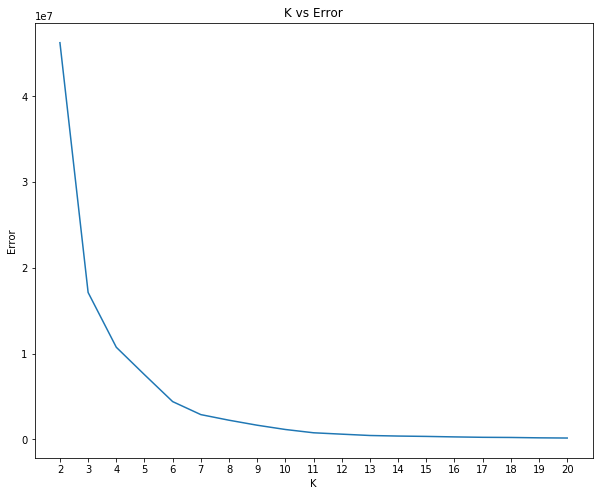

In [646]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have 7 clusters in our data. Let's retrain the model and plot the hostels on the map.

In [647]:
# train final model with k=9
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [653]:
tokyo_hostels_df['RatingCluster'] = kmeans.labels_

In [652]:
tokyo_map = folium.Map(location=(35.689487, 139.691711), zoom_start=11)

# set color scheme for the clusters
x = np.arange(9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, name, cluster in zip(tokyo_hostels_df.Latitude, tokyo_hostels_df.Longitude, tokyo_hostels_df.Name, kmeans.labels_):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#FFF',
        fill_opacity=0.75,
        parse_html=False).add_to(tokyo_map)
    
tokyo_map

_**Examining Clusters**_

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. But we won't be doing it for all. We'll compare first two clusters for the sake of brevity

##### Cluster 0

In [657]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 0].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,14.000000,14.000000,14.000000,14.00000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,3785.714286,6.664286,8.671429,8.15000,8.921429,8.20000,8.757143,8.664286,9.185714,8.785714,139.745607,35.692388,0.0
std,203.269972,3.828156,0.722633,1.11338,1.117813,1.03478,0.672211,1.305378,0.758396,0.995264,0.037821,0.044775,0.0
min,3500.000000,1.400000,6.800000,6.00000,6.700000,6.00000,8.000000,6.000000,7.300000,6.700000,139.693004,35.550492,0.0
25%,3600.000000,4.250000,8.475000,7.92500,8.100000,8.00000,8.000000,7.775000,8.700000,8.450000,139.704999,35.689835,0.0
50%,3750.000000,6.750000,8.950000,8.00000,9.300000,8.50000,8.950000,9.050000,9.300000,8.950000,139.748664,35.704967,0.0
75%,3975.000000,8.850000,9.100000,8.97500,9.700000,9.00000,9.375000,9.600000,9.875000,9.275000,139.777024,35.713089,0.0
max,4100.000000,16.100000,9.400000,10.00000,10.000000,9.30000,9.700000,10.000000,10.000000,10.000000,139.794981,35.731081,0.0


**Traits: High Cost, Within 6km of City center, Slightly low facilities rating**

##### Cluster 1

In [658]:
tokyo_hostels_df[tokyo_hostels_df.RatingCluster == 1].describe()

,StartPrice,DistanceFromCityCentre,OverallScore,Atmosphere,Cleanliness,Facilities,Location,Security,Staff,ValueForMoney,Longitude,Latitude,RatingCluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,2070.967742,8.670968,8.867742,8.235484,9.141935,8.767742,8.538710,9.151613,9.254839,8.961290,139.772538,35.702886,1.0
std,103.902353,2.939183,0.637384,1.205141,0.841734,0.884830,1.164954,0.622292,0.551264,0.735607,0.034510,0.039464,0.0
min,1900.000000,1.600000,7.000000,4.000000,6.000000,6.000000,4.000000,7.700000,8.000000,6.500000,139.667695,35.526993,1.0
25%,2000.000000,8.050000,8.700000,8.000000,8.950000,8.550000,8.500000,8.950000,9.100000,8.800000,139.776794,35.692738,1.0
50%,2000.000000,8.700000,9.000000,8.400000,9.300000,9.000000,8.900000,9.200000,9.400000,9.100000,139.782843,35.698945,1.0
75%,2200.000000,9.600000,9.200000,8.800000,9.600000,9.100000,9.100000,9.500000,9.600000,9.250000,139.791735,35.721996,1.0
max,2200.000000,18.100000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.800993,35.778200,1.0


**Traits: Low Cost, Within 9km of City center, High staff and cleanliness ratings. Low atmospehere rating**

We can do the same for the other 5 clusters as well, but we are not doing that now.

NEIGHBORHOOD CLUSTER

EXAMINE ABOVE CLUSTER

PREDICT START PRICE BASED ON CLUSTER AND NEIGHBORHOOD

## 6. Conclusion